In [53]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from math import factorial
from scipy.linalg import solveh_banded
np.set_printoptions(precision=3, linewidth=200)
from scipy.special import roots_legendre, roots_chebyt
from scipy.integrate import quad
from scipy.misc import derivative
from scipy.stats import qmc

In [54]:
def get_points(a, b, n, mode):
    if mode == 'uniform':
        points = np.linspace(a, b, n)
    elif mode == 'random':
        points = np.concatenate(([a], np.sort(np.random.rand(n - 2) * (b - a) + a), [b]))
    elif mode == 'chebyshev':
        points = (np.polynomial.chebyshev.chebpts1(n) + 1) / 2 * (b - a) + a
    else:
        print(f'incorrect mode {mode}')
        points = 0
    return np.array(points)

In [55]:
def gauss_legendre(n, a, b, f, verbose=False):
    points = roots_legendre(n)[0]
    points_projected = (points + 1) / 2 * (b - a) + a
    l = Polynomial.fromroots(points)
    w = l.deriv()
    d = np.zeros(n)
    for i, x in enumerate(points):
        l_i  = Polynomial.fromroots(list(points[:i]) + list(points[i+1:])) / w(x)
        l_i_integr = l_i.integ()
        d[i] = l_i_integr(1) - l_i_integr(-1)
        d[i] *= (b - a) / 2
    if verbose:    
        print('d', d)
    fx = f(points_projected)
    res = np.sum(fx * d)
    print('quadrature result =', res)
    integration = quad(f, -1, 1)
    print('gauss-legendre error =', np.abs(res - integration[0]), '\n')

In [56]:
def gauss_chebyshev(n, a, b, f, verbose=False):
    points = roots_chebyt(n)[0]
    points_projected = (points + 1) / 2 * (b - a) + a
    l = Polynomial.fromroots(points)
    w = l.deriv()
    d = np.zeros(n)
    for i, x in enumerate(points):
        l_i  = Polynomial.fromroots(list(points[:i]) + list(points[i+1:])) / w(x)
        l_i_integr = l_i.integ()
        d[i] = l_i_integr(1) - l_i_integr(-1)
        d[i] *= (b - a) / 2
    if verbose:    
        print('d', d)
    fx = f(points_projected)
    res = np.sum(fx * d)
    print('quadrature result =', res)
    integration = quad(f, -1, 1)
    print('gauss-chebyshev error =', np.abs(res - integration[0]), '\n')
    return np.abs(res - integration[0])

In [57]:
def monte_carlo(f, a, b, eps, verbose=False):
    # mode: std, geo, geo_sobol, geo_sobol_shuffle
    n = int( (3 * (b - a) / eps)**2 / 12) + 1
    if verbose:
        print(n)
    points = a + np.random.rand(n) * (b - a)
    res = 0
    for i in range(n):
        res += f(points[i])
    res *= (b - a) / n
    print('monte carlo res =', res)
    integration = quad(f, -1, 1)
    print('monte carlo error =', np.abs(res - integration[0]), '\n')
    return res

In [58]:
def f(x):
    return 1 / np.sqrt(1 - np.power(x, 4))

In [59]:
def plot(f, a, b, name):
    #a = a - 1
    #b = b + 1
    plot_points = get_points(a + 1e-6, b - 1e-6, int(100 * (b - a)), 'uniform')
    plt.plot(plot_points, f(plot_points), label='function')
    plt.title(name)
    plt.legend()
    plt.grid()
    plt.show()

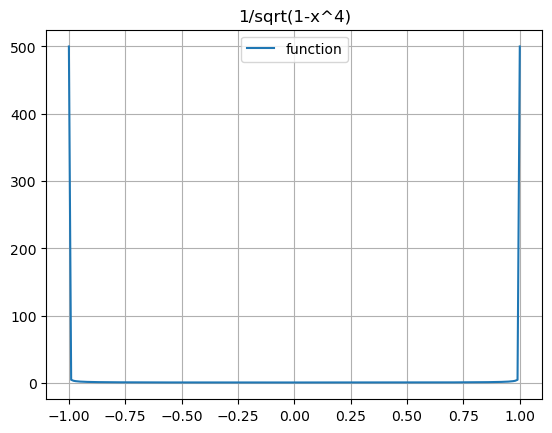

In [60]:
plot(f, -1, 1, '1/sqrt(1-x^4)')

In [61]:
integration = quad(f, -1, 1)
print('scipy integration result =', integration[0])

scipy integration result = 2.622057554291515


In [62]:
np.random.seed(703)
gauss_legendre(15, -1, 1, f)
eps = gauss_chebyshev(15, -1, 1, f)
monte_carlo(f, -1, 1, eps)
'вот так вот'

quadrature result = 2.5426689657794244
gauss-legendre error = 0.07938858851209085 

quadrature result = 2.5893788434657115
gauss-chebyshev error = 0.03267871082580376 

monte carlo res = 2.611050862176242
monte carlo error = 0.011006692115273164 



'вот так вот'